In [20]:
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import matplotlib as plit

In [2]:
df = pd.read_csv("dataset_fish.csv")

In [3]:
df.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

In [4]:
df.describe()

Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [7]:
df.Species = df.Species.map({"Bream":1,"Roach":2,"Whitefish":3,"Parkki":4,"Perch":5,"Pike":6,"Smelt":7})

In [8]:
corr = round(df.corr(),4)
corr.style.background_gradient()

<Axes: >

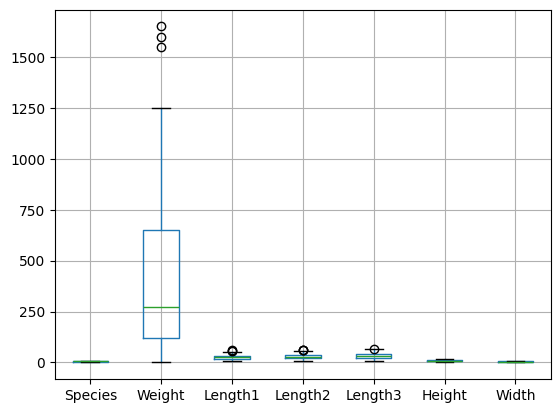

In [9]:
df.boxplot()

In [30]:
x = df.drop(["Weight","Species"] ,axis=1)
y = df.Weight

In [31]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

In [32]:
# Inicializamos el modelo
linear = LinearRegression()

In [33]:
linear.fit(train_x, train_y)

LinearRegression()

In [34]:
y_predicted = linear.predict(test_x)

In [37]:

print(f'Calificacion de prediccion: {round(linear.score(test_x,test_y), 4) * 100} %')

Calificacion de prediccion: 86.6 %


In [46]:
length1 = 26.8
length2 = 29.7	
length3 = 34.5
height = 14.1795
width = 5.2785


In [47]:
def predict_weight(length1,length2,length3,height,width,model):
    result =model.predict([[length1,length2,length3,height,width]])
    print(f"El pez con longitud1 de {length1} , longitud2 de {length2},longitud3 de {length3}, con ancho de {width} y altura {height} deberia pesar {result[0]}")


In [48]:
predict_weight(length1,length2,length3,height,width,linear)

El pez con longitud1 de 26.8 , longitud2 de 29.7,longitud3 de 34.5, con ancho de 5.2785 y altura 14.1795 deberia pesar 503.1798359142672


d:\Archivos\OneDrive\Escritorio\Ingenieria de sistemas\7semestre\Algoritmica\repository\mi_entorno\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
